In [30]:
import os, sys
import subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import matplotlib.pyplot as plt
import pickle

In [21]:
ddbthr = 0.79
ddcthr = 0.15

In [7]:
year='2017'

# Check if pickle exists     
picklename = '../'+year+'/ttbar-templates.pkl'
if not os.path.isfile(picklename):
    print("You need to create the pickle")

In [26]:
# Read the histogram from the pickle file
templates = pickle.load(open(picklename,'rb')).sum('genflavor1','genflavor2').integrate('systematic','nominal').integrate('region','signal')
templates

<Hist (process,msd1,msd2,ddb1,ddc2) instance at 0x7f57d0eb44c0>

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWa

<AxesSubplot:xlabel='Jet 2 $m_{sd}$', ylabel='Events'>

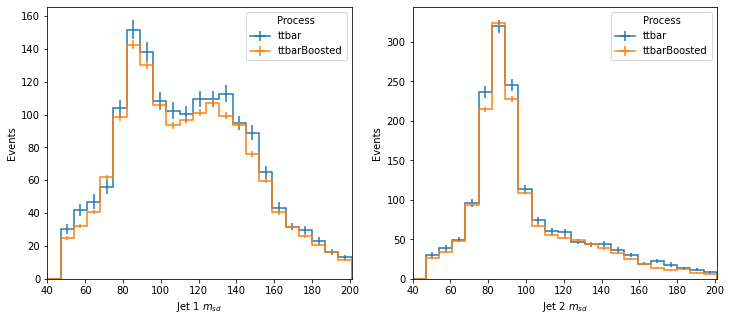

In [43]:
inclusive = templates.sum('ddb1','ddc2')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
hist.plot1d(inclusive.sum('msd2'),overlay='process',ax=ax1)
hist.plot1d(inclusive.sum('msd1'),overlay='process',ax=ax2)

In [48]:
charmpass = templates.sum('msd2').integrate('ddc2',int_range=slice(ddcthr,1)).integrate('ddb1',int_range=slice(ddbthr,1))
charmfail = templates.sum('msd2').integrate('ddc2',int_range=slice(ddcthr,1)).integrate('ddb1',int_range=slice(0,ddbthr))

lightpass = templates.sum('msd2').integrate('ddc2',int_range=slice(0,ddcthr)).integrate('ddb1',int_range=slice(ddbthr,1))
lightfail = templates.sum('msd2').integrate('ddc2',int_range=slice(0,ddcthr)).integrate('ddb1',int_range=slice(0,ddbthr))

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWa

Text(0.5, 1.0, 'Light cat, DDB pass')

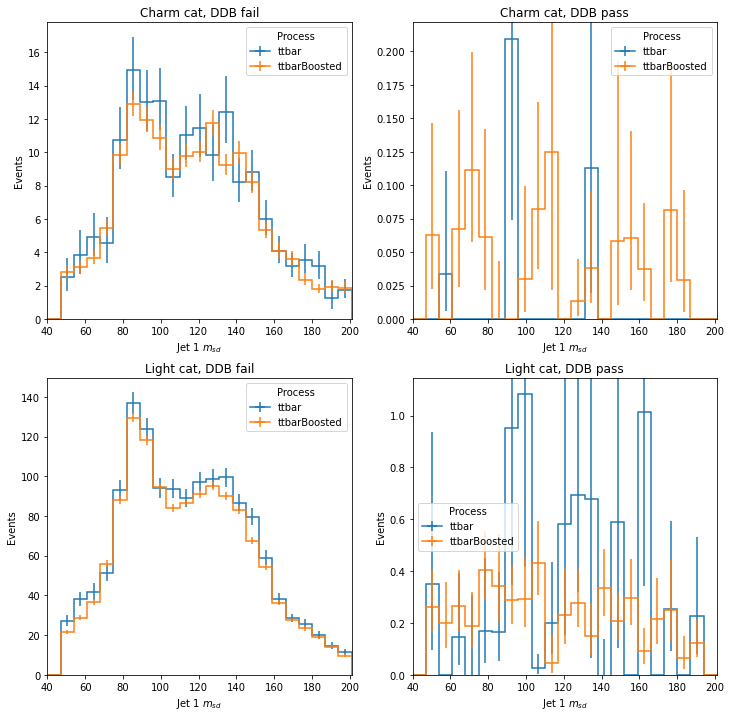

In [54]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
hist.plot1d(charmfail,overlay='process',ax=ax1)
ax1.set_title('Charm cat, DDB fail')
hist.plot1d(charmpass,overlay='process',ax=ax2)
ax2.set_title('Charm cat, DDB pass')
hist.plot1d(lightfail,overlay='process',ax=ax3)
ax3.set_title('Light cat, DDB fail')
hist.plot1d(lightpass,overlay='process',ax=ax4)
ax4.set_title('Light cat, DDB pass')